<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/point_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import urllib.request

(532, 796, 3)


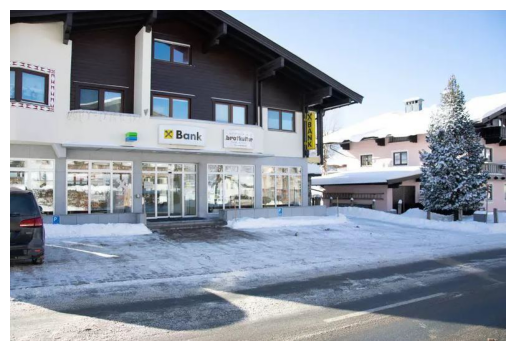

In [2]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

split into channels


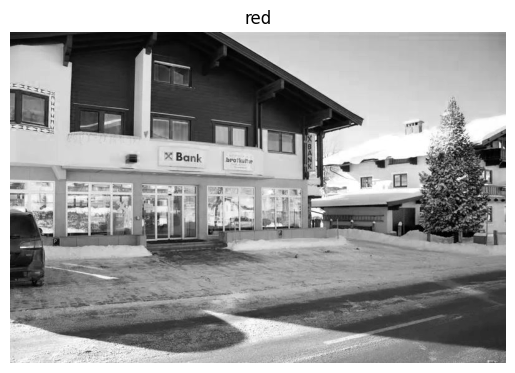

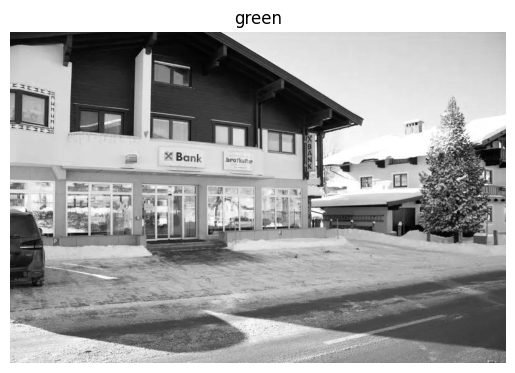

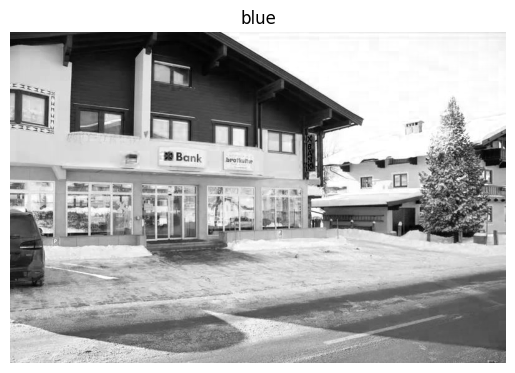

In [3]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]
plt.figure()
plt.imshow(r_mask, 'gray')
plt.title('red')
plt.axis('off')
plt.figure()
plt.imshow(g_mask, 'gray')
plt.title('green')
plt.axis('off')
plt.figure()
plt.imshow(b_mask, 'gray')
plt.title('blue')
plt.axis('off');
print('split into channels')

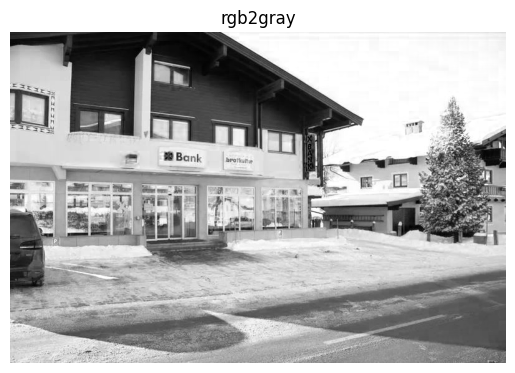

In [4]:
#turn image to gray
img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140

plt.imshow(b_mask, 'gray')
plt.title('rgb2gray')
plt.axis('off');

# Histogram

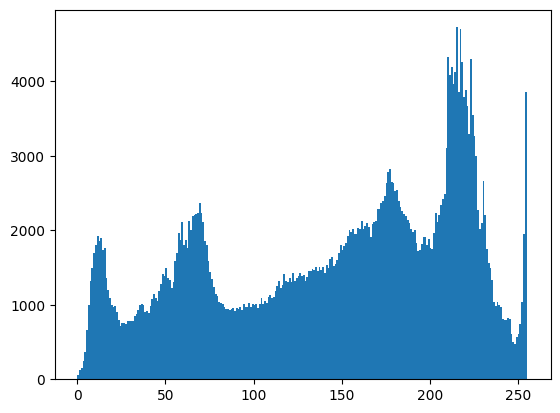

In [11]:
plt.hist(img.flatten(), bins=256, range=(0, 256));

# Threshold

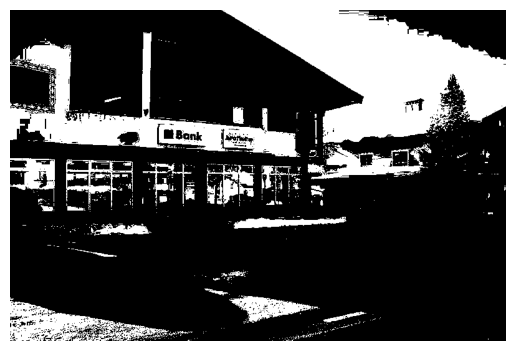

In [22]:
threshold = 210
mask = img > threshold

plt.imshow(mask, cmap='gray')
plt.axis('off');

# digital inverting

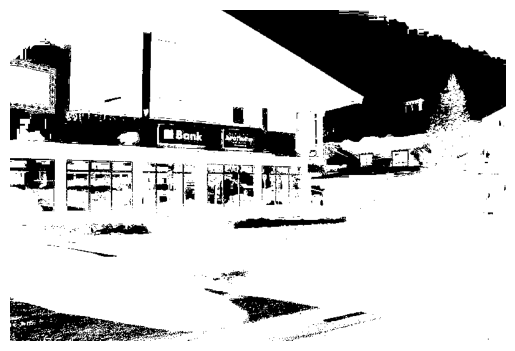

In [21]:

plt.imshow(255-mask, cmap='gray')
plt.axis('off');

# Contrast stretching

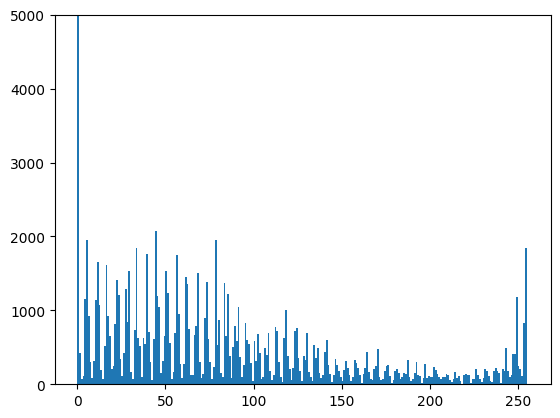

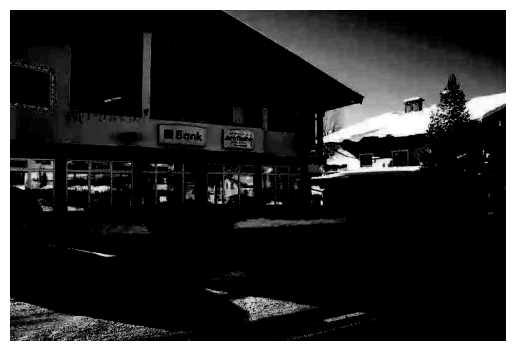

In [55]:
min = 210
max = 255
new_img = np.zeros_like(img)
def F(x):
    x = 255/(max-min) * (x-min)
    if x < 0: return 0
    if x > 255: return 255
    return x
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i,j] = F(img[i,j])

plt.hist(new_img.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(new_img, cmap='gray')
plt.axis('off');

# Histogram equalization

sources:
https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

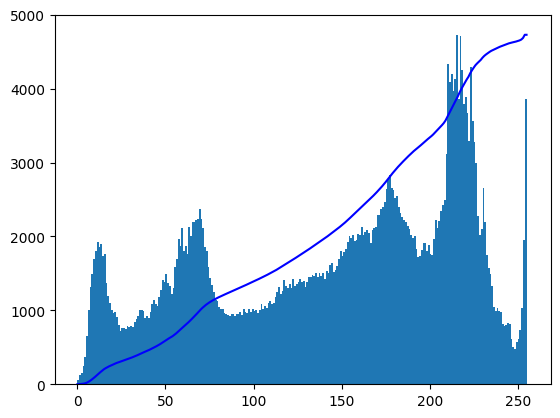

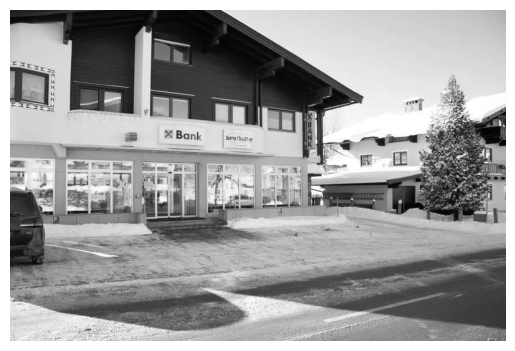

In [70]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * float(hist.max())/cdf.max()
plt.plot(cdf_norm, color='b')
def F(x):
    x = cdf_norm[]/
    if x < 0: return 0
    if x > 255 return 255
    return x
new_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i, j] = F(img[i, j])


plt.hist(new_img.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(img, cmap ='gray')
plt.axis('off');

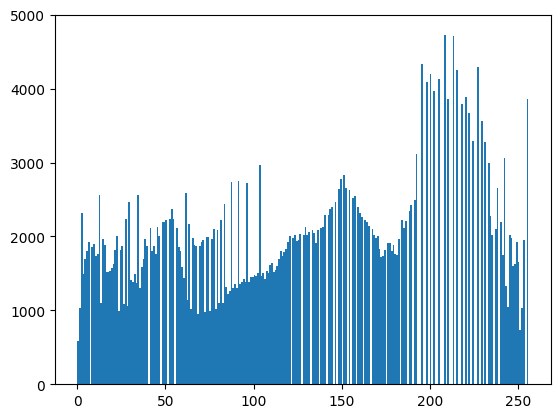

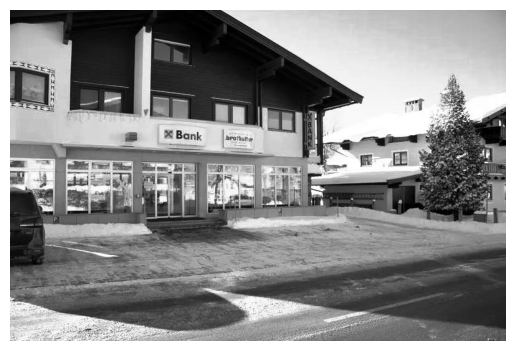

In [69]:
import cv2
_img = np.uint8(img)
equ = cv2.equalizeHist(_img)
plt.hist(equ.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(equ, cmap ='gray')
plt.axis('off');


# Local Operations

Avg filter: smooth_noise

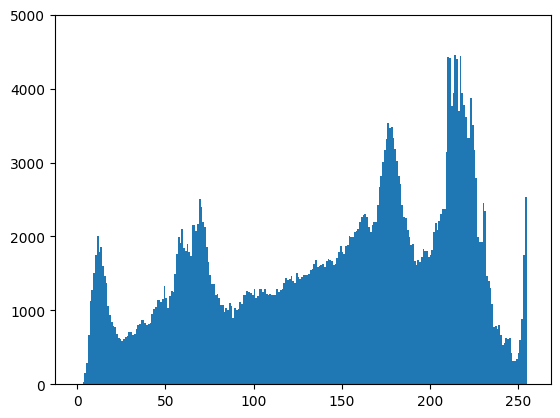

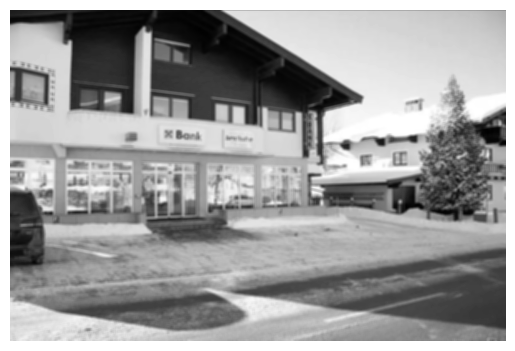

In [85]:
import cv2
_img = np.uint8(img)
k = 5
kernel= 1/k**2 *np.ones((k,k), np.float32)
new_img = cv2.filter2D(_img,-1, kernel)
plt.hist(new_img.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(new_img, cmap ='gray')
plt.axis('off');

# Edge detector filter

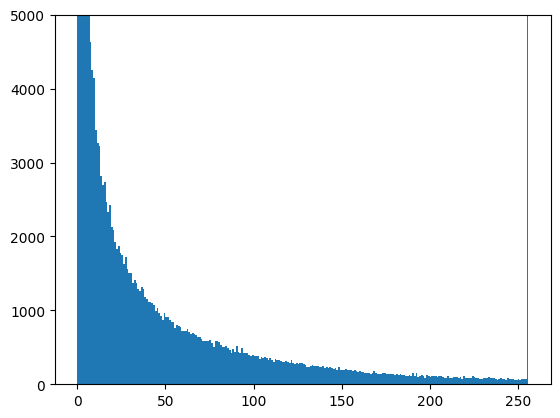

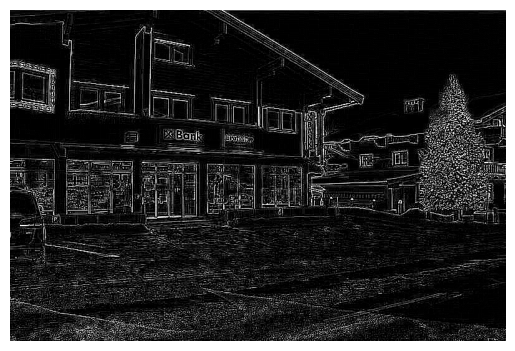

In [86]:
import cv2
_img = np.uint8(img)
kernel= np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

new_img = cv2.filter2D(_img,-1, kernel)
plt.hist(new_img.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(new_img, cmap ='gray')
plt.axis('off');

Horizontal edge detector

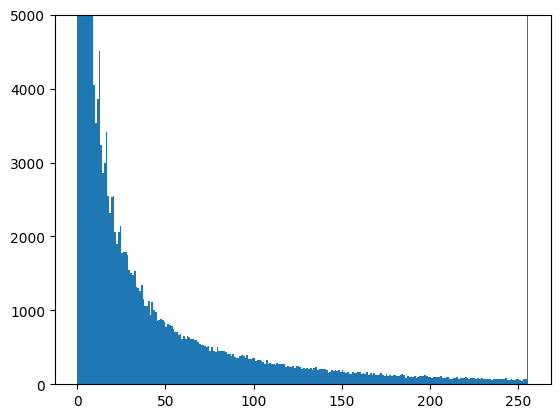

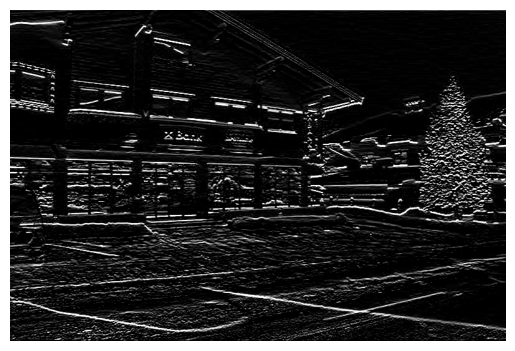

In [87]:
import cv2
_img = np.uint8(img)
kernel= np.array([[-1,-2,-1],[0, 0, 0],[1,2,1]])

new_img = cv2.filter2D(_img,-1, kernel)
plt.hist(new_img.flatten(), bins=256, range=(0,256))
plt.ylim([0, 5000])
plt.figure()
plt.imshow(new_img, cmap ='gray')
plt.axis('off');